In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:

df=pd.read_csv("train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])


-0.5433513806577547

In [4]:
# Drop non-numeric columns from the dataframe
df = df.drop(['Name', 'Sex','Ticket','Cabin','Embarked'], axis=1)

In [5]:
#creating corelation matrix
matrix = df.corr()
print(matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [6]:
#visualization 1 of Titanic Dataset
df.corr().style.background_gradient(cmap="Greens")


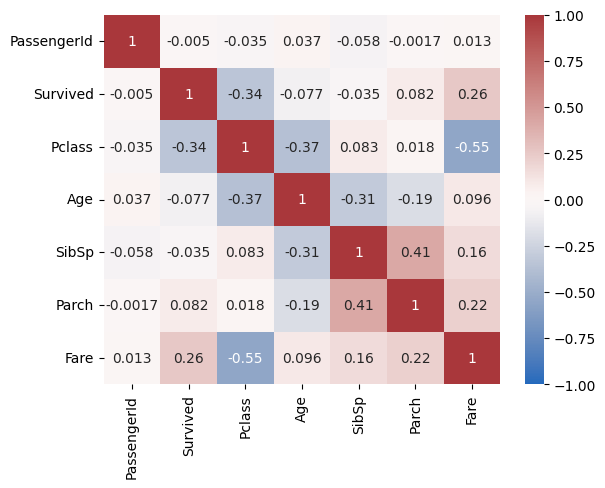

In [7]:
#visualization 2 of Titanic Dataset
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [9]:
# Load the dataset
df = pd.read_csv("train.csv")

In [10]:
# Select features and target
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

In [11]:
# Preprocess categorical variables
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [13]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [14]:
# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_imputed, y_train)


GaussianNB()

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

In [16]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 77.65%


In [17]:
#Glass Dataset
glass=pd.read_csv("glass.csv")
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [18]:
#visualization 1 of Glass Dataset
glass.corr().style.background_gradient(cmap="Greens")


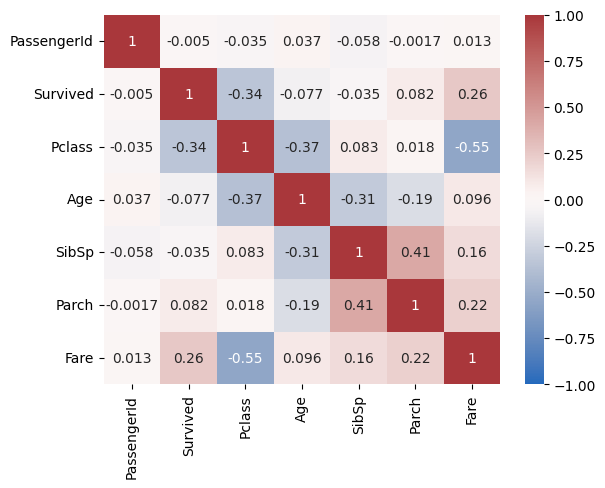

In [19]:
#visualization 2 of Glass Dataset
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [20]:
#Naïve Bayes method of Glass Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [21]:
# Load the dataset
glass_data = pd.read_csv('glass.csv')

In [22]:
# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [25]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)


Accuracy Score: 55.81%

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [27]:
#Linear SVM method of Glass Dataset
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
#To avoid warnings
warnings.filterwarnings("ignore")

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [29]:
# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)


Accuracy Score: 51.16%

Classification Report:
               precision    recall  f1-score   support

           1       0.37      1.00      0.54        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

    accuracy                           0.51        43
   macro avg       0.36      0.46      0.38        43
weighted avg       0.34      0.51      0.38        43

